In [1]:
import numpy as np
import cv2
import pytesseract
import matplotlib
import matplotlib.pyplot as plt

In [22]:
realTime_list = []
showTime_list = []

# Set tesseract path to the location of tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'D:\Program Files\Tesseract-OCR\tesseract.exe'
config = '-c tessedit_char_whitelist=0123456789 --psm 6'
# Open video file
video = cv2.VideoCapture('Videos/micro_usb_latency.mp4')

while(video.isOpened()):
    ret, frame = video.read()

    if ret:
        # Convert frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Histogram Equalization
        equalized_image = cv2.equalizeHist(gray)

        # Image binarization
        _, threshold1 = cv2.threshold(equalized_image, 70, 255, cv2.THRESH_BINARY)
        _, threshold2 = cv2.threshold(equalized_image, 165, 255, cv2.THRESH_BINARY)

        # OCR
        text1 = pytesseract.image_to_string(threshold1, config=config)
        text2 = pytesseract.image_to_string(threshold2, config=config)

        # text filter
        text1 = text1.replace(" ", "")
        text2 = text2.replace(" ", "")
        
        if text1 != "" and text2 != "":
            text1 = text1.splitlines()
            text1 = max(text1, key=len)
            print(text1)
            realTime_list.append(text1)

            text2 = text2.splitlines()
            text2 = max(text2, key=len)
            print(text2)
            showTime_list.append(text2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()

0129539
0129189
0129598
0129248
0129596
0129248
0129655
0129306
0129655
0129306
0129713
0129364
0129718
01229423
0129710
0129423
0129829
0129481
0129829
0129481
0129887
012294814
0129887
0129539
0129945
0129539
0130088
0129596
0130003
0129655
013006234
0129655
0130061
0129713
6012301199
0129713
01301195
0129770
01301781
0129770
0130238
0129829
601330230
0129887
0130296
0129387
8601302945
0129945
0130352
0129993
01303524
0130003
01304104
0130062
01304689
0130361
0130468
0130119
0130588
0130119
0130526
0130178
01305854
01302786
601305854
0130236
601306434
0130236
01307437
0130294
01307014
0130352
6601307607
0130352
601307609
0130410
6001308189
0130468
601308184
0130468
601308764
0130526
601309359
0130525
601309354
0130585
013099383
0130643
601310514
0130701
601310514
01307010
01311094
0130760
601311681
0130818
601311681
0130818
60013122881
0130876
0131226
0130876
601312844
0130935
6013312844
0130935
01313437
0130993
401314031
0131051
6013314014
0131051
601314581
0131109
01314594
0131109


178


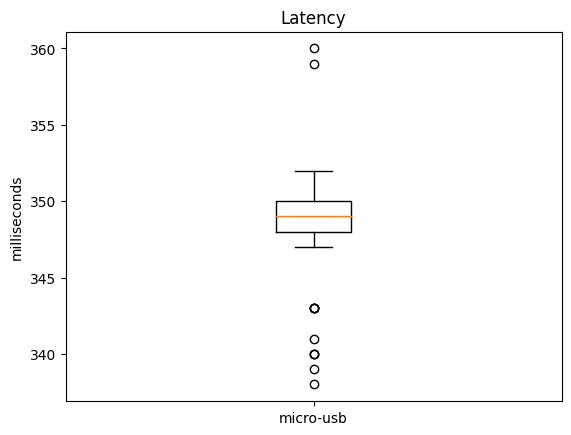

In [71]:
timeCount = np.c_[realTime_list, showTime_list]
latency_list = []

for i in range(len(timeCount)):
    if len(timeCount[i, 0])==7 and len(timeCount[i, 1])==7 and int(timeCount[i, 0]) > int(timeCount[i, 1]):
        if i > 0 and i < len(timeCount) - 1:
            if int(timeCount[i, 0]) >= int(timeCount[i-1, 0]) and int(timeCount[i, 1]) >= int(timeCount[i-1, 1]):
                realTime_ms = int(timeCount[i, 0]) % 1000 + int(int(timeCount[i, 0]) / 1000) % 100 * 1000 + \
                            int(int(int(timeCount[i, 0]) / 1000) / 100) * 60 * 1000
                showTime_ms = int(timeCount[i, 1]) % 1000 + int(int(timeCount[i, 1]) / 1000) % 100 * 1000 + \
                            int(int(int(timeCount[i, 1]) / 1000) / 100) * 60 * 1000
                latency_list.append(realTime_ms - showTime_ms)
        else:
            realTime_ms = int(timeCount[i, 0]) % 1000 + int(int(timeCount[i, 0]) / 1000) % 100 * 1000 + \
                        int(int(int(timeCount[i, 0]) / 1000) / 100) * 60 * 1000
            showTime_ms = int(timeCount[i, 1]) % 1000 + int(int(timeCount[i, 1]) / 1000) % 100 * 1000 + \
                        int(int(int(timeCount[i, 1]) / 1000) / 100) * 60 * 1000
            latency_list.append(realTime_ms - showTime_ms)

print(len(latency_list))

# 计算平均值和标准差
latency_mean = np.mean(latency_list)
latency_std = np.std(latency_list)

# 设置阈值
threshold = 0.5

# 根据阈值去除异常值
microusb_latency = [x for x in latency_list if abs(x - latency_mean) < threshold * latency_std]

labels=["micro-usb"]
plt.boxplot(microusb_latency, labels=labels)
plt.title('Latency')
plt.ylabel('milliseconds')
plt.show()


In [79]:
realTime_list = []
showTime_list = []

# Set tesseract path to the location of tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'D:\Program Files\Tesseract-OCR\tesseract.exe'
config = '-c tessedit_char_whitelist=0123456789 --psm 6'
# Open video file
video = cv2.VideoCapture('Videos/vp8.mp4')

while(video.isOpened()):
    ret, frame = video.read()

    if ret:
        # Convert frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Histogram Equalization
        equalized_image = cv2.equalizeHist(gray)

        # Image binarization
        _, threshold1 = cv2.threshold(equalized_image, 70, 255, cv2.THRESH_BINARY)
        # cv2.imshow('Image', threshold1)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        _, threshold2 = cv2.threshold(equalized_image, 165, 255, cv2.THRESH_BINARY)
        # cv2.imshow('Image', threshold2)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

        # OCR
        text1 = pytesseract.image_to_string(threshold1, config=config)
        text2 = pytesseract.image_to_string(threshold2, config=config)

        # text filter
        text1 = text1.replace(" ", "")
        text2 = text2.replace(" ", "")
        
        if text1 != "" and text2 != "":
            text1 = text1.splitlines()
            text1 = max(text1, key=len)
            print(text1)
            realTime_list.append(text1)

            text2 = text2.splitlines()
            text2 = max(text2, key=len)
            print(text2)
            showTime_list.append(text2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()

0135179
7
0135238
0134423
0135238
0134340
0135296
0134540
0135354
0134540
0135354
0134540
0135411
0134556
9135411
0134556
0135528
0134772
0135586
0134772
0135586
2
0135644
01734830
0135644
701734839
0135703
013439372
0135761
0134947
0135761
0134947
0135819
0135063
0135819
0135063
6135994
0135238
0136052
2
0136111
7
01361694
77
0136221
77
0136285
0135528
9736402
135644
0136519
4
0136571
4
0136693
4
0136693
7
0136752
0135936
0136752
01235936
0136810
0235952
0136868
4
0137042
0
0137159
0136344
01372174
0136462
0137217
0136462
0137275
2
9737275
7
0137332
365
9137390
365
9737390
4
9737449
4
0137449
4
01375654
0136752
01376234
0136810
01376234
01736810
01376814
2
01377394
0136921
01377394
0136921
01377984
022370877
9138206
74
01382646
2
0138613
027372568
0138613
027377568
01387884
22
01389634
7
6139021
7
9139079
382
01394274
2
01394274
0138672
0139486
0138730
0139486
0138730
0139719
7
9139892
1
0140125
0139253
0140125
0139311
0140183
0139311
0140183
0139427
0740242
0139427
01404164
0139662
9

85
84


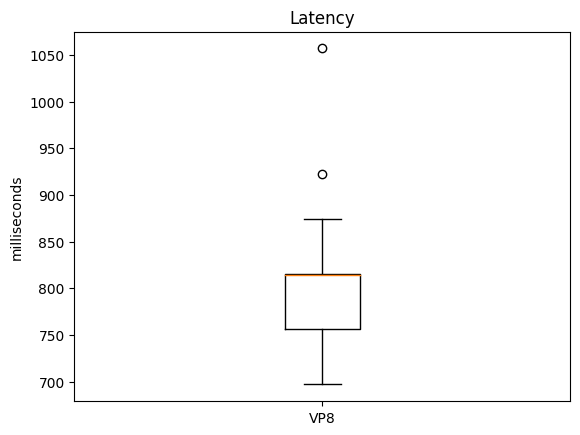

In [100]:
timeCount = np.c_[realTime_list, showTime_list]
latency_list = []

for i in range(len(timeCount)):
    if len(timeCount[i, 0])==7 and len(timeCount[i, 1])==7 and int(timeCount[i, 0]) > int(timeCount[i, 1]):
        if i > 0 and i < len(timeCount) - 1:
            if int(timeCount[i, 0]) >= int(timeCount[i-1, 0]) and int(timeCount[i, 1]) >= int(timeCount[i-1, 1]):
                realTime_ms = int(timeCount[i, 0]) % 1000 + int(int(timeCount[i, 0]) / 1000) % 100 * 1000 + \
                            int(int(int(timeCount[i, 0]) / 1000) / 100) * 60 * 1000
                showTime_ms = int(timeCount[i, 1]) % 1000 + int(int(timeCount[i, 1]) / 1000) % 100 * 1000 + \
                            int(int(int(timeCount[i, 1]) / 1000) / 100) * 60 * 1000
                latency_list.append(realTime_ms - showTime_ms)
        else:
            realTime_ms = int(timeCount[i, 0]) % 1000 + int(int(timeCount[i, 0]) / 1000) % 100 * 1000 + \
                        int(int(int(timeCount[i, 0]) / 1000) / 100) * 60 * 1000
            showTime_ms = int(timeCount[i, 1]) % 1000 + int(int(timeCount[i, 1]) / 1000) % 100 * 1000 + \
                        int(int(int(timeCount[i, 1]) / 1000) / 100) * 60 * 1000
            latency_list.append(realTime_ms - showTime_ms)


latency_list = [x for x in latency_list if x < 5000]
print(len(latency_list))

# 计算平均值和标准差
latency_mean = np.mean(latency_list)
latency_std = np.std(latency_list)

# 设置阈值
threshold = 5

# 根据阈值去除异常值
vp8_latency = [x for x in latency_list if abs(x - latency_mean) < threshold * latency_std]
print(len(vp8_latency))
labels=["VP8"]
plt.boxplot(vp8_latency, labels=labels)
plt.title('Latency')
plt.ylabel('milliseconds')
plt.show()